# Data Preparation

In [ ]:
df.isna().sum()

patientID          2373
male                  0
age                   0
education           166
currentSmoker         0
cigsPerDay         1977
BPMeds               89
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol              72
sysBP                 0
diaBP                 0
BMI                  31
heartRate             1
glucose             589
TenYearCHD            0
a1c                3156
income             2795
dtype: int64

In [ ]:
# Filling all the Nan vaue with zero for the rows with current Smoker=0
df.loc[df['currentSmoker']==0,['cigsPerDay']]=df.loc[df['currentSmoker']==0,['cigsPerDay']].fillna(0)


In [ ]:
pip install SciPy

## Skew ness

In [ ]:

# Clip the column to remove outliers
clipped_column = df['totChol'].clip( upper=500)

# Replace the original column with the clipped column
df['totChol']=clipped_column


In [ ]:
#applying log Tranfomation
col=['glucose','income','a1c']

for col in col:
  df[col]=np.log(df[col]+1)

In [ ]:
from scipy.stats import skew

for col in df.columns:
  if len(df[col].value_counts())>4:
    skew=df[col].skew()
    if skew>5:
      print(f'Skew before:  {col}={skew}')
      df[col]=np.log(df[col])
      skew1=df[col].skew()
      print(f'Skew aftr log tranformation :  {col}={skew1}')

In [ ]:
df['cigsPerDay'].value_counts()

cigsPerDay
0.0     1948
20.0     666
30.0     193
15.0     180
10.0     124
9.0      116
5.0      109
3.0       87
40.0      72
43.0      54
1.0       54
25.0      49
6.0       17
35.0      17
2.0       15
7.0       12
60.0      11
8.0       10
4.0        9
18.0       7
17.0       7
50.0       6
23.0       5
11.0       4
12.0       3
16.0       3
13.0       3
14.0       2
45.0       2
19.0       2
38.0       1
70.0       1
Name: count, dtype: int64

## Missing Values

In [ ]:
df['education']=df['education'].fillna(0)

## Test Train

In [ ]:
# test train split
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

from sklearn.model_selection import train_test_split
train,test =train_test_split(df,test_size=0.2,stratify=y)


In [ ]:
train['TenYearCHD'].value_counts()/len(train['TenYearCHD'])

TenYearCHD
0    0.84966
1    0.15034
Name: count, dtype: float64

In [ ]:
test['TenYearCHD'].value_counts()/len(test['TenYearCHD'])

TenYearCHD
0    0.849584
1    0.150416
Name: count, dtype: float64

In [ ]:
train.isna().sum()

patientID          1903
male                  0
age                   0
education             0
currentSmoker         0
cigsPerDay           23
BPMeds               72
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol              59
sysBP                 0
diaBP                 0
BMI                  24
heartRate             1
glucose             472
TenYearCHD            0
a1c                2512
income             2223
dtype: int64

In [ ]:
df.isna().sum()

patientID           0
male                0
age                 0
education          12
currentSmoker       0
cigsPerDay          2
BPMeds              8
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             3
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose            27
a1c                27
income              0
dtype: int64

In [ ]:
train=df

In [ ]:
train


,patientID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,a1c,income
0,110399,1,48,3.0,1,10.0,0.0,0,1,0,232.0,138.0,90.0,22.37,64,4.290459,1.619527,9.474779
1,189047,1,41,2.0,0,0.0,0.0,0,0,0,195.0,139.0,88.0,26.88,85,4.189655,1.566438,9.844746
2,957019,1,54,1.0,1,20.0,0.0,0,1,0,214.0,147.0,74.0,24.71,96,4.477337,1.717624,9.644717
3,208967,1,37,2.0,0,0.0,0.0,0,1,0,225.0,124.5,92.5,38.53,95,4.430817,1.656871,9.668208
4,230935,0,63,1.0,1,3.0,0.0,0,1,0,267.0,156.5,92.5,27.10,60,4.382027,1.680962,9.892376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,245906,0,41,1.0,0,0.0,0.0,0,1,0,229.0,150.0,89.0,36.07,75,4.532599,1.821860,9.513994
419,186677,0,37,3.0,1,15.0,0.0,0,0,0,173.0,101.0,69.0,20.02,63,4.304065,1.556762,10.255939
420,462501,0,63,1.0,0,0.0,0.0,0,1,0,257.0,170.0,105.0,25.49,79,4.477337,1.705605,9.537051
421,802256,1,43,4.0,1,20.0,0.0,0,0,0,187.0,129.5,88.0,25.62,80,4.330733,1.661851,9.676399


In [ ]:
# filled with median
median_values = {}

for column in ['totChol', 'BMI', 'heartRate', 'a1c', 'glucose']:
    med = train[column].median()
    train[column] = train[column].fillna(med)
    test[column] = test[column].fillna(med)
    median_values[column] = med

median_df = pd.DataFrame(median_values.items(), columns=['Column', 'Median'])
print(median_df)

      Column      Median
0    totChol  235.000000
1        BMI   25.500000
2  heartRate   75.000000
3        a1c    1.622931
4    glucose    4.369448


In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
X_train=train

In [ ]:
X_train = train.drop(columns=['TenYearCHD'])
y_train = train['TenYearCHD']

X_test = test.drop(columns=['TenYearCHD'])
y_test = test['TenYearCHD']

KeyError: "['TenYearCHD'] not found in axis"

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (402, 18)
Shape of X_test: (738, 18)
Shape of y_train: (3006,)
Shape of y_test: (738,)


In [ ]:
X_train.isna().sum()

patientID          0
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
a1c                0
income             0
dtype: int64

In [ ]:
df_encoded.dtypes

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler=MinMaxScaler(
)

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
X_train = X_train.reset_index(drop=True)
train= train.reset_index(drop=True)

In [ ]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X.columns)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X.columns)

In [ ]:
from sklearn.decomposition import PCA


# Create a PCA instance
pca = PCA(n_components=15)  # Specify the number of components you want to retain

# Fit PCA to your feature matrix and transform the data
Xtrain_pca = pca.fit_transform(X_train_scaled)
Xtest_pca=pca.transform(X_test_scaled)


# The transformed data X_pca now contains the reduced features


(2996, 2)

## Feature selection

In [ ]:
X_train_scaled.shape

(2995, 18)

In [ ]:
X_train_scaled.dropna(inplace=True)

In [ ]:
X_train_scaled.isna().sum()

patientID          0
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
a1c                0
income             0
dtype: int64

In [ ]:


# Step 1: Initialize SelectKBest with the desired scoring function
selector = SelectKBest(score_func=f_regression, k=10)  # You can adjust k as needed

# Step 2: Fit the selector to your data
X_new = selector.fit_transform(X_train_scaled, y_train)

# Step 3: Get the selected feature indices
selected_features_indices = selector.get_support(indices=True)

# Step 4: Get the names of the selected features
selected_features_names = list(X_train_scaled.columns[selected_features_indices])

In [ ]:
# Select best K

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  # You can choose another scoring function


# Step 1: Initialize SelectKBest with the desired scoring function
selector = SelectKBest(score_func=f_regression, k=10)  # You can adjust k as needed

# Step 2: Fit the selector to your data
X_new = selector.fit_transform(X_train, y_train
                              )

# Step 3: Get the selected feature indices
selected_features_indices = selector.get_support(indices=True)

# Step 4: Get the names of the selected features
selected_features_names = X_train.columns[selected_features_indices]

# Step 5: Use the selected features in further analysis
X_selected = X_train_scaled[selected_features_names]
X_test_selected=X_test_scaled[selected_features_names]


ValueError: Found input variables with inconsistent numbers of samples: [402, 3006]

In [ ]:
X_train

In [ ]:
X_selected=X_train[selected_features_names

                   ]
X_selected

,male,age,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,a1c
0,1,48,0.0,1,0,232.0,138.0,90.0,4.290459,1.619527
1,1,41,0.0,0,0,195.0,139.0,88.0,4.189655,1.566438
2,1,54,0.0,1,0,214.0,147.0,74.0,4.477337,1.717624
3,1,37,0.0,1,0,225.0,124.5,92.5,4.430817,1.656871
4,0,63,0.0,1,0,267.0,156.5,92.5,4.382027,1.680962
...,...,...,...,...,...,...,...,...,...,...
397,0,41,0.0,1,0,229.0,150.0,89.0,4.532599,1.821860
398,0,37,0.0,0,0,173.0,101.0,69.0,4.304065,1.556762
399,0,63,0.0,1,0,257.0,170.0,105.0,4.477337,1.705605
400,1,43,0.0,0,0,187.0,129.5,88.0,4.330733,1.661851


<ipython-input-274-109fd70180e5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_scores, y=sorted_column_names, palette='viridis')


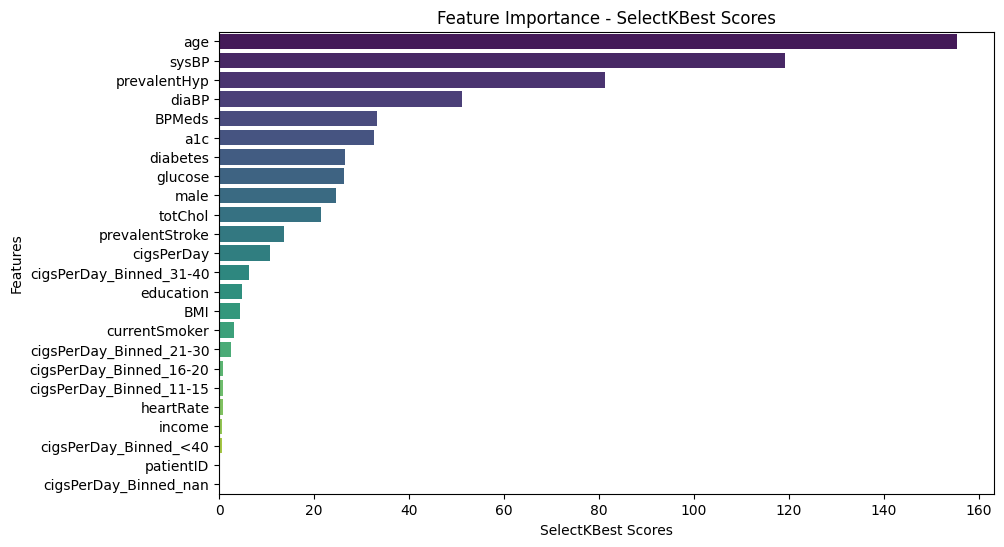

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming selector.scores_ contains the SelectKBest scores and column_names contains the column names

# Sort the scores and column names together
sorted_scores, sorted_column_names = zip(*sorted(zip(selector.scores_, X.columns), reverse=True))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_scores, y=sorted_column_names, palette='viridis')

# Add labels and title
plt.xlabel('SelectKBest Scores')
plt.ylabel('Features')
plt.title('Feature Importance - SelectKBest Scores')

# Show plot
plt.show()


In [ ]:
X_test_selected

,male,age,BPMeds,prevalentHyp,totChol,sysBP,diaBP,BMI,glucose,a1c
0,1.0,0.135135,0.0,0.0,0.255814,0.146572,0.276243,0.380029,0.229785,0.203318
1,1.0,0.918919,0.0,1.0,0.291990,0.612293,0.895028,0.236306,0.223340,0.208326
2,0.0,0.189189,0.0,0.0,0.175711,0.134752,0.209945,0.151721,0.223340,0.184855
3,0.0,0.783784,0.0,1.0,0.462532,0.274232,0.403315,0.203829,0.242398,0.219360
4,1.0,0.837838,0.0,1.0,0.124031,0.531915,0.552486,0.312409,0.342144,0.300054
...,...,...,...,...,...,...,...,...,...,...
666,0.0,0.648649,0.0,0.0,0.395349,0.241135,0.292818,0.369365,0.321845,0.291833
667,1.0,0.324324,0.0,0.0,0.645995,0.267139,0.386740,0.264178,0.295083,0.267999
668,1.0,0.486486,0.0,1.0,0.307494,0.307329,0.464088,0.248182,0.342144,0.311946
669,0.0,0.891892,0.0,1.0,0.540052,0.385343,0.475138,0.176927,0.305983,0.271236


In [ ]:
pip install skrebate

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29255 sha256=c3a443158f4482dad21fe349e9e37ac86a95ea6e695b90a4c6570735cbdecd08
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of input features
input_dim = X_train.shape[1]

# Initialize a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, input_dim=input_dim, activation='relu'))  # 64 units, relu activation
model.add(Dense(32, activation='relu'))  # 32 units, relu activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit for binary classification, sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_adasyn, y_adasyn, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_selected, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 18), found shape=(None, 10)


In [ ]:
from sklearn.metrics import confusion_matrix

# Predict probabilities on the test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


24/24 [==============================] - 0s 5ms/step
Confusion Matrix:
[[633   0]
 [115   0]]


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN,SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
# Oversampling using Random Oversampler
ros = RandomUnderSampler(sampling_strategy=0.2)
X_ros, y_ros = ros.fit_resample(X_selected, y_train)

# Oversampling using BorderlineSMOTE
smote = BorderlineSMOTE(random_state=42,kind = 'borderline-2')
X_smote, y_smote = smote.fit_resample(X_selected, y_train)

# Oversampling using ADASYN
adasyn = SVMSMOTE(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_ros, y_ros)


In [ ]:
traincv(X_smote,y_smote,X_test_selected,y_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

def traincv(X_train,y_train,X_test,y_test):
  # Define base models with their respective hyperparameter grids
  rf_model = RandomForestClassifier()
  rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
  gb_model = GradientBoostingClassifier()
  gb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
  nb_model = GaussianNB()

  # Perform hyperparameter tuning for each base model using GridSearchCV
  rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='f1', n_jobs=-1)
  rf_grid_search.fit(X_train, y_train)
  rf_best_model = rf_grid_search.best_estimator_

  gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=3, scoring='f1', n_jobs=-1)
  gb_grid_search.fit(X_train, y_train)
  gb_best_model = gb_grid_search.best_estimator_

  # Create VotingClassifier with tuned models
  voting_clf = VotingClassifier(estimators=[('rf', rf_best_model), ('gb', gb_best_model), ('nb', nb_model)], voting='soft')

  # Train VotingClassifier
  voting_clf.fit(X_train, y_train)

  # Evaluate VotingClassifier
  y_pred = voting_clf.predict(X_test)
  print(classification_report(y_test, y_pred))


In [ ]:
confusion_matrix(y_pred,y_test)

array([[462,  49],
       [168,  65]])

In [ ]:
y_ros.value_counts()

TenYearCHD
0    2265
1     453
Name: count, dtype: int64

In [ ]:
y_adasyn.value_counts(

)

TenYearCHD
1    2600
0    2547
Name: count, dtype: int64

In [ ]:
y_smote.value_counts(

)

TenYearCHD
0    2265
1    2265
Name: count, dtype: int64

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
i=0
j=0
num_col=[]
cat_col=[]
scaler = StandardScaler()
numeric_col=pd.DataFrame()
for col in df.columns:
  if len(df[col].value_counts())>4:
    num_col.append(col)
    numeric_col[col]=df[col]
    i=i+1
  else:
    cat_col.append(col)
    j=j+1



# Fit the scaler to your data (compute mean and standard deviation)
scaler.fit(numeric_col)

# Transform your data using the fitted scaler
X_scaled = scaler.transform(numeric_col)


In [ ]:
x_test_scaled=scaler.fit_transform(test[num_col])

X_test=pd.DataFrame(x_test_scaled,columns=num_col)
for col in cat_col:
  X_test[col]=test[col]

NameError: name 'num_col' is not defined

In [ ]:
X_test = X_test.reset_index(drop=True)
test = test.reset_index(drop=True)
X_test[cat_col] = test[cat_col]
X_test.isna().sum()


patientID             0
age                   0
cigsPerDay         1335
totChol              35
sysBP                 0
diaBP                 0
BMI                  24
heartRate             4
glucose             236
a1c                 236
income                0
male                  0
education             0
currentSmoker         0
BPMeds               38
prevalentStroke       0
prevalentHyp          0
diabetes              0
TenYearCHD            0
dtype: int64

In [ ]:

X_train=pd.DataFrame(X_scaled,columns=num_col)
X_train = X_train.reset_index(drop=True)
train= train.reset_index(drop=True)
for col in cat_col:
  X_train[col]=train[col]
X_train.isna().sum()

patientID             0
age                   0
cigsPerDay         1975
totChol              47
sysBP                 0
diaBP                 0
BMI                  19
heartRate             1
glucose             361
a1c                 361
income                0
male                  0
education             0
currentSmoker         0
BPMeds               38
prevalentStroke       0
prevalentHyp          0
diabetes              0
TenYearCHD            0
dtype: int64

In [ ]:

y_train=X_train['TenYearCHD']
X_train=X_train.drop(['TenYearCHD'],axis=1)
X_train.isna().sum()

patientID             0
age                   0
cigsPerDay         1975
totChol              47
sysBP                 0
diaBP                 0
BMI                  19
heartRate             1
glucose             361
a1c                 361
income                0
male                  0
education             0
currentSmoker         0
BPMeds               38
prevalentStroke       0
prevalentHyp          0
diabetes              0
dtype: int64

In [ ]:
y_test=X_test['TenYearCHD']
X_test=X_test.drop(['TenYearCHD'],axis=1)
X_test

,age,education,cigsPerDay,totChol,BMI,heartRate,a1c,income,avg,male,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0.040228,0.063078,0.882498,-1.696464,-1.245480,-0.075800,-0.161113,-0.422994,-1.456557,1,0.0,0,0,0
1,-0.905443,0.063078,-0.023059,0.978896,-0.731935,0.345068,-0.448240,-0.056565,-0.665372,0,0.0,0,0,0
2,-1.260070,0.063078,-0.763969,-0.109386,0.405873,-0.244148,-0.145778,-0.253188,-0.587805,0,0.0,0,0,0
3,0.985899,0.063078,-0.763969,0.185357,-1.629461,-1.422578,-0.145778,-0.474070,-0.044835,0,0.0,0,0,0
4,-1.141861,0.063078,0.882498,-1.174995,-0.910969,0.850109,0.003212,-0.321162,-0.122402,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,-0.787234,1.046573,-0.352352,-0.540164,-0.312619,0.345068,-0.371916,-0.319754,-0.339590,0,0.0,0,0,0
760,-0.196190,0.063078,0.882498,-1.265685,0.090208,0.008373,-0.145778,0.412208,-0.711912,0,0.0,0,0,0
761,1.104108,1.046573,-0.763969,0.752170,-1.469272,-0.496668,0.526787,-0.229507,-1.037694,0,0.0,0,0,0
762,-1.496488,0.063078,-0.763969,-0.449474,-0.779049,0.092547,0.172523,0.243235,0.094786,1,0.0,0,0,0


## Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(X_smote,y_smote)

y_pred=model.predict(X_test_selected)

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve,accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

f1=f1_score(y_test,y_pred,average='weighted')
con=confusion_matrix(y_test,y_pred)
print(f1)
con


0.7397328391764236


array([[446, 181],
       [ 40,  71]])

In [ ]:
train(X_smote,y_smote,X_smote,X_test_selected,X_test_selected)

Model: Logistic Regression
F1-score weighted by class: 0.7397328391764236
Confusion Matrix:
[[446 181]
 [ 40  71]]
Model: Random Forest
F1-score weighted by class: 0.7947733162191318
Confusion Matrix:
[[561  66]
 [ 81  30]]
Model: Decision Tree
F1-score weighted by class: 0.769961887894302
Confusion Matrix:
[[507 120]
 [ 64  47]]
Model: Naive Bayes
F1-score weighted by class: 0.8017821474141491
Confusion Matrix:
[[531  96]
 [ 59  52]]
Model: K-Nearest Neighbors
F1-score weighted by class: 0.7386077744921853
Confusion Matrix:
[[473 154]
 [ 62  49]]
Model: AdaBoost
F1-score weighted by class: 0.749683530057892
Confusion Matrix:
[[477 150]
 [ 57  54]]


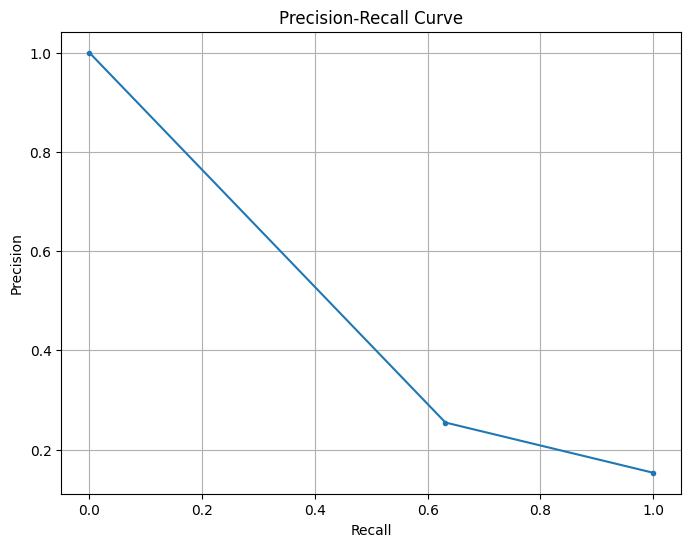

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score,confusion_matrix, average_precision_score, roc_auc_score

def train(X_train,y_train,X_train_scaled,X_test,X_test_scaled):
  # Initialize classifiers
  lr_classifier = LogisticRegression()
  rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
  dt_classifier = DecisionTreeClassifier()
  nb_classifier = GaussianNB()
  knn_classifier = KNeighborsClassifier()
  adaboost_classifier = AdaBoostClassifier()

  # Train classifiers
  lr_classifier.fit(X_train_scaled, y_train)
  rf_classifier.fit(X_train, y_train)
  dt_classifier.fit(X_train, y_train)
  nb_classifier.fit(X_train, y_train)
  knn_classifier.fit(X_train_scaled, y_train)
  adaboost_classifier.fit(X_train, y_train)

  # Predictions
  lr_preds = lr_classifier.predict(X_test_scaled)
  rf_preds = rf_classifier.predict(X_test)
  dt_preds = dt_classifier.predict(X_test)
  nb_preds = nb_classifier.predict(X_test)
  knn_preds = knn_classifier.predict(X_test_scaled)
  adaboost_preds = adaboost_classifier.predict(X_test)



  from sklearn.metrics import f1_score, confusion_matrix

  # Define a function to calculate F1-score weighted by class and print confusion matrix
  def evaluate_model(y_true, y_pred, model_name):
      f1_weighted = f1_score(y_true, y_pred, average='weighted')
      cm = confusion_matrix(y_true, y_pred)
      auc=average_precision_score(y_true, y_pred)
      print(f"Model: {model_name}")
      print(f"F1-score weighted by class: {f1_weighted}")
      print("Confusion Matrix:")
      print(cm)
     # print(auc)

  # Predictions
  lr_preds = lr_classifier.predict(X_test_scaled)
  rf_preds = rf_classifier.predict(X_test)
  dt_preds = dt_classifier.predict(X_test)
  nb_preds = nb_classifier.predict(X_test)
  knn_preds = knn_classifier.predict(X_test_scaled)
  adaboost_preds = adaboost_classifier.predict(X_test)

  # Evaluation
  evaluate_model(y_test, lr_preds, "Logistic Regression")
  evaluate_model(y_test, rf_preds, "Random Forest")
  evaluate_model(y_test, dt_preds, "Decision Tree")
  evaluate_model(y_test, nb_preds, "Naive Bayes")
  evaluate_model(y_test, knn_preds, "K-Nearest Neighbors")
  evaluate_model(y_test, adaboost_preds, "AdaBoost")



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define scoring metric
scorer = make_scorer(f1_score, average='weighted')

# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_smote, y_smote)

# Output best F1 weighted score and corresponding hyperparameters
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print("Best F1 weighted score:", best_score)
print("Best hyperparameters:", best_params)

# Get the best estimator from the grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_rf_classifier.predict(X_test_selected)

# Calculate the F1 score on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Best F1 weighted score (on test set):", test_f1_score)



Best F1 weighted score: 0.8768410586097433
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 weighted score (on test set): 0.7909491907612256


In [ ]:
X_selected

,male,age,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,a1c
0,1,48,0.0,1,0,232.0,138.0,90.0,4.290459,1.619527
1,1,41,0.0,0,0,195.0,139.0,88.0,4.189655,1.566438
2,1,54,0.0,1,0,214.0,147.0,74.0,4.477337,1.717624
3,1,37,0.0,1,0,225.0,124.5,92.5,4.430817,1.656871
4,0,63,0.0,1,0,267.0,156.5,92.5,4.382027,1.680962
...,...,...,...,...,...,...,...,...,...,...
397,0,41,0.0,1,0,229.0,150.0,89.0,4.532599,1.821860
398,0,37,0.0,0,0,173.0,101.0,69.0,4.304065,1.556762
399,0,63,0.0,1,0,257.0,170.0,105.0,4.477337,1.705605
400,1,43,0.0,0,0,187.0,129.5,88.0,4.330733,1.661851


In [ ]:
y_act_pred=best_rf_classifier.predict(X_selected)

139

In [ ]:
class_labels=[0,1]

In [ ]:
rf_predictions = model.predict_proba(X_test_selected)
y_pred_proba=rf_predictions[:,1]
y_pred_binary = (y_pred_proba >= 0.6).astype(int)
rf_confusion_matrix = confusion_matrix(y_test, y_pred_binary, labels=class_labels)
ensemble_f1_score = f1_score(y_test, y_pred_binary,average='weighted')
print("Ensemble F1 score:", ensemble_f1_score)
print("Random Forest Confusion Matrix:")
print(pd.DataFrame(rf_confusion_matrix, index=class_labels, columns=class_labels))

Ensemble F1 score: 0.7704683029468227
Random Forest Confusion Matrix:
     0    1
0  462  119
1   53   39


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.9 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,f1_score


params = {
    'iterations': 1000,  # number of trees
    'learning_rate': 0.1,  # learning rate
    'depth': 6,  # maximum depth of the tree
    'loss_function': 'Logloss',  # loss function
    'eval_metric': 'F1',  # evaluation metric
    'random_seed': 42 , # random seed for reproducibility
    'use_best_model': True
}

# Initialize CatBoost model
model = CatBoostClassifier(**params)

# Train the model
model.fit(X_adasyn, y_adasyn,eval_set=(X_test_selected, y_test), verbose=100)


# Predict on the testing data
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", accuracy)
print("f1:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(average_precision_score(y_test, y_pred))


0:	learn: 0.7563353	test: 0.3438395	best: 0.3438395 (0)	total: 21.6ms	remaining: 21.6s
100:	learn: 0.8790960	test: 0.3241107	best: 0.3691275 (28)	total: 984ms	remaining: 8.76s
200:	learn: 0.9353526	test: 0.2790698	best: 0.3691275 (28)	total: 1.63s	remaining: 6.47s
300:	learn: 0.9576636	test: 0.2346939	best: 0.3691275 (28)	total: 2.54s	remaining: 5.89s
400:	learn: 0.9723035	test: 0.2198953	best: 0.3691275 (28)	total: 3.88s	remaining: 5.8s
500:	learn: 0.9820789	test: 0.2187500	best: 0.3691275 (28)	total: 4.89s	remaining: 4.87s
600:	learn: 0.9874832	test: 0.1989529	best: 0.3691275 (28)	total: 5.65s	remaining: 3.75s
700:	learn: 0.9908666	test: 0.1752577	best: 0.3691275 (28)	total: 6.3s	remaining: 2.69s
800:	learn: 0.9937805	test: 0.1818182	best: 0.3691275 (28)	total: 6.93s	remaining: 1.72s
900:	learn: 0.9966777	test: 0.2153846	best: 0.3691275 (28)	total: 7.78s	remaining: 855ms
999:	learn: 0.9980093	test: 0.2000000	best: 0.3691275 (28)	total: 8.51s	remaining: 0us

bestTest = 0.3691275168
be

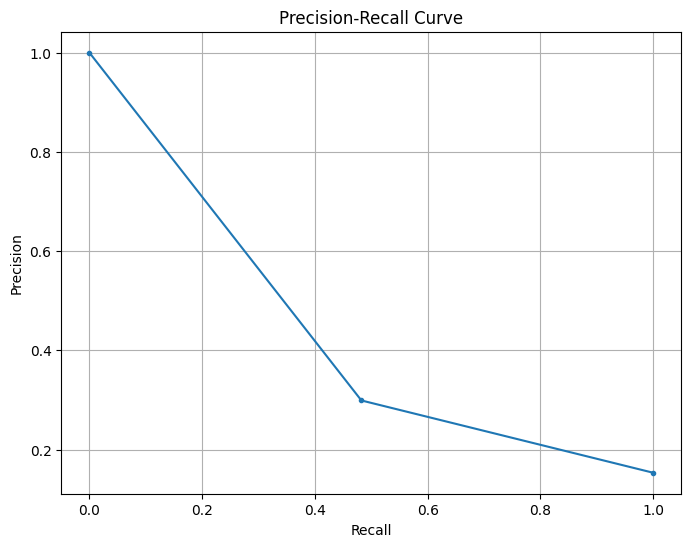

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming y_true are the true labels and y_score are the predicted probabilities
# of the positive class (e.g., output of model.predict_proba(X_test)[:, 1])

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [ ]:
rf_predictions = model.predict_proba(X_test_selected)
y_pred_proba=rf_predictions[:,1]
y_pred_binary = (y_pred_proba >= 0.5).astype(int)
rf_confusion_matrix = confusion_matrix(y_test, y_pred_binary, labels=class_labels)
ensemble_f1_score = f1_score(y_test, y_pred_binary,average='weighted')
print("Ensemble F1 score:", ensemble_f1_score)
print("Random Forest Confusion Matrix:")
print(pd.DataFrame(rf_confusion_matrix, index=class_labels, columns=class_labels))

Ensemble F1 score: 0.8035408081684977
Random Forest Confusion Matrix:
     0  1
0  581  0
1   91  1


In [ ]:
train_and_evaluate(X_ros,y_ros,X_test_selected)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Assuming X_train, y_train are your training data
X_train,y_train=X_ros,y_ros
# 1. Logistic Regression hyperparameter tuning
lr_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_

# 2. Naive Bayes does not have hyperparameters to tune

# 3. Decision Tree hyperparameter tuning
dt_params = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# 4. k-Nearest Neighbors hyperparameter tuning
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# After tuning, you can evaluate the models on the test set and choose the best-performing one.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
rf_classifier

RandomForestClassifier(random_state=42)

In [ ]:
rf_predictions = rf_classifier.predict_proba(X_test_selected)
y_pred_proba=rf_predictions[:,1]
y_pred_binary = (y_pred_proba >= 0.1).astype(int)
rf_confusion_matrix = confusion_matrix(y_test, y_pred_binary, labels=class_labels)
ensemble_f1_score = f1_score(y_test, y_pred_binary)
print("Ensemble F1 score:", ensemble_f1_score)
print("Random Forest Confusion Matrix:")
print(pd.DataFrame(rf_confusion_matrix, index=class_labels, columns=class_labels))



Ensemble F1 score: 0.28156748911465895
Random Forest Confusion Matrix:
     0    1
0  158  479
1   16   97


In [ ]:
rf_classifier.fit(X_ros,y_ros)


RandomForestClassifier(random_state=42)

In [ ]:
train_and_evaluate(X_ros,y_ros,X_test_selected)

Ensemble F1 score: 0.3104693140794224
Ensemble Confusion Matrix:
     0    1
0  516  121
1   70   43


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score

def train_and_evaluate(X_train,y_train,X_test):
# Define classifiers
  rf_classifier = RandomForestClassifier()
  svm_classifier = SVC(probability=True)
  gb_classifier = GradientBoostingClassifier()
  dt_classifier = DecisionTreeClassifier()
  nn_classifier = MLPClassifier()

  # Create an ensemble of classifiers
  ensemble_classifier = VotingClassifier(estimators=[
      ('rf', rf_classifier),
      ('svm', svm_classifier),
      ('gb', gb_classifier),
      ('dt', dt_classifier),
      ('nn', nn_classifier)],
      voting='hard')  # 'hard' voting means a majority vote from all classifiers

  # Train the ensemble classifier
  ensemble_classifier.fit(X_train, y_train)

  # Make predictions
  ensemble_predictions = ensemble_classifier.predict(X_test)

  # Calculate accuracy
  ensemble_f1_score = f1_score(y_test, ensemble_predictions)
  print("Ensemble F1 score:", ensemble_f1_score)

  # Calculate confusion matrix
  ensemble_confusion_matrix = confusion_matrix(y_test, ensemble_predictions)
  print("Ensemble Confusion Matrix:")
  print(pd.DataFrame(ensemble_confusion_matrix, index=class_labels, columns=class_labels))


## Over sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# Oversampling using Random Oversampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Oversampling using ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

In [ ]:
feature_names= ['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit Random Forest on the training data
rf_classifier.fit(X_test, y_test)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort features based on their importance scores
sorted_indices = feature_importances.argsort()[::-1]

# Select the top k features (e.g., top 10)
k = 10
selected_features = sorted_indices[:k]

# Filter the training and testing data to include only the selected features
X_train_selected = X_train_scaled.iloc[:,selected_features]
X_test_selected = X_test_scaled.iloc[:,selected_features]


# Oversampling using SMOTE
ros = RandomUnderSampler(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_selected, y_train)

# Train a classifier on the selected features
rf_classifier_selected = RandomForestClassifier(n_estimators=200,max_depth=12)
rf_classifier_selected.fit(X_smote, y_smote)

# Evaluate model performance on testing data
y_pred = rf_classifier_selected.predict(X_test_selected)
con=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(con)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       634
           1       0.26      0.37      0.31       115

    accuracy                           0.74       749
   macro avg       0.57      0.59      0.58       749
weighted avg       0.78      0.74      0.76       749

[[514 120]
 [ 72  43]]


In [ ]:

X_train_selected


,sysBP,totChol,age,a1c,patientID,BMI,diaBP,income,glucose,heartRate
0,-0.322687,-1.183981,-0.996371,0.005390,1.492020,-0.236727,0.441765,1.310140,-0.313299,2.618686
1,0.129812,-1.528064,1.213494,0.443061,1.028148,1.184592,1.243048,-0.886604,0.399954,-1.075123
2,-0.888312,0.108503,1.097185,-0.868994,-0.013708,0.138716,-0.612554,-0.006157,-0.901142,-1.494874
3,-1.363436,0.086900,-1.461606,0.392843,-1.046336,-1.504456,-0.907764,0.442500,0.214908,-0.739322
4,0.921686,0.021541,0.050407,-0.068842,-0.487580,2.437694,1.875639,0.432130,-0.108897,-0.319571
...,...,...,...,...,...,...,...,...,...,...
2990,-0.367937,-0.089277,-0.763754,-0.231940,-0.604508,1.079761,-0.317345,-0.529343,-0.176144,-0.319571
2991,0.627562,-0.179687,1.562420,0.607563,0.018852,0.321561,-0.064308,-0.669956,0.338999,-0.487472
2992,0.718062,0.562107,1.329802,0.708405,-1.108500,0.241109,-0.739073,-1.012863,0.694472,-0.823273
2993,1.442061,0.942329,1.097185,-0.680576,0.378364,0.952988,-0.148654,-0.876806,-0.823932,0.352030


In [ ]:
y_smote

0       0
1       0
2       0
3       0
4       0
       ..
1881    1
1882    1
1883    1
1884    1
1885    1
Name: TenYearCHD, Length: 1886, dtype: int64

array([0.84335209, 0.        , 0.5       , 0.5       , 0.        ,
       0.3220339 , 0.        , 0.        , 1.        , 0.        ,
       0.02605473, 0.32387707, 0.54705882, 0.23630635, 0.6744186 ,
       0.11016949, 0.13007747, 0.07506429])

In [ ]:
feature_names[sorted_indices]

Index(['sysBP', 'income', 'BMI', 'patientID', 'a1c', 'age', 'totChol', 'diaBP',
       'glucose', 'heartRate', 'cigsPerDay', 'education', 'male',
       'currentSmoker', 'prevalentHyp', 'BPMeds', 'diabetes',
       'prevalentStroke'],
      dtype='object')

In [ ]:


# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit Random Forest on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort features based on their importance scores
sorted_indices = feature_importances.argsort()[::-1]

# Select the top k features (e.g., top 10)
k = 10
selected_features = sorted_indices[:k]

# Filter the training and testing data to include only the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train a classifier on the selected features
rf_classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_selected.fit(X_train_selected, y_train)

# Evaluate model performance on testing data
y_pred = rf_classifier_selected.predict(X_test_selected)
print(classification_report(y_test, y_pred))


In [ ]:
def train_and_evaluate(X_resampled, y_resampled):
    model = LogisticRegression()
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

print("Random Oversampling:")
train_and_evaluate(X_ros, y_ros)

print("\nSMOTE:")
train_and_evaluate(X_smote, y_smote)

print("\nADASYN:")
train_and_evaluate(X_adasyn, y_adasyn)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your features in X and target variable in y

# Define the number of folds
num_folds = 5

# Initialize KFold with the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []

# Loop over each fold
for train_index, test_index in kf.split(df):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train your model (e.g., RandomForestClassifier)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list of accuracy scores
    accuracy_scores.append(accuracy)

# Calculate the mean and standard deviation of the accuracy scores
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


KeyError: "None of [Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,\n       ...\n       3804, 3805, 3806, 3807, 3808, 3810, 3811, 3812, 3814, 3815],\n      dtype='int64', length=3052)] are in the [columns]"

In [ ]:
kf.split(X)

<generator object _BaseKFold.split at 0x7adee7677300>